**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

#### **<span style="color:red">[데이터 컬럼]</span>**
1. CustomerID: 고객ID
2. gender: 성별
3. SeniorCitizen: 고령자 여부 (1, 0)
4. Partner: 배우자가 있는 지 여부 (Yes, No)
5. Dependents: 부양가족 여부 (Yes, No)
6. Tenure: 서비스 사용 개월수
7. PhoneService: 폰서비스 이용여부 (Yes, No)
8. MultipleLines: 다회선 이용여부 (Yes, No, No phone service)
9. InternetService: 인터넷 서비스 제공업체 (DSL, Fiber optic, No)
10. OnlineSecurity: 온라인 보안 이용여부 (Yes, No, No internet service)
11. OnlineBackup:온라인 백업 이용여부 (Yes, No, No internet service)
12. DeviceProtection: 디바이스 보호 이용여부 (Yes, No, No internet service)
13. TechSupport: 기술지원 이용여부 (Yes, No, No internet service)
14. StreamingTV: 스트리밍TV 이용여부 (Yes, No, No internet service)
15. StreamingMovies: 스트리밍 영화 이용여부 (Yes, No, No internet service)
16. Contract: 접촉 주기 (Month-to-month, One year, Two years)
17. PaperlessBilling: 온라인 빌링 이용여부 (Yes, No)
18. PaymentMethod: 요금납부방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: 월 이용요금
20. TotalCharges: 총 이용요금
21. Churn: 이탈여부 (Yes or No)

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [1]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Numpy를 사용할 수 있도록 별칭(alias)을 np로 해서 불러오세요.

In [2]:
# 여기에 답안코드를 작성하세요.
import numpy as np

* 구글 코랩 마운트를 합시다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [4]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/미니프로젝트5차개별과제1(AICE 연습)/2023.10.23_미니프로젝트5차_실습자료/고객이탈여부/churn_data.csv')

<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [5]:
# 여기에 답안코드를 작성하세요.
df1 = df.drop(['customerID'], axis=1)

<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [6]:
# 여기에 답안코드를 작성하세요.
df1['TotalCharges'].replace(' ', 0, inplace=True)
df1['TotalCharges'] = df1['TotalCharges'].astype(float)
df2 = df1.copy()

<br>

### 6. df2에서 Churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고
### Yes, No를 각각 1, 0으로 변환한 후 df3에 저장하세요.

* 물론 Yes, No 같은 문자열 형태로 놔둘 수 있긴 한데,<br> 일부 머신러닝 알고리즘에서만 Yes, No를 자동적으로 0, 1 같은 숫자 형태로 변환해주지만, 그렇지 않은 경우도 있다.

* 따라서 맘 편하게, Yes, No를 0, 1과 같은 숫자 형태로 변환하는 것이 좋다.

In [8]:
# 여기에 답안코드를 작성하세요.
display(df2['Churn'].value_counts())

df2['Churn'] = df2['Churn'].map({
    'Yes' : 1,
    'No' : 0
})

df3 = df2.copy()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Yes, No에 따른 데이터 불균형이 존재한다고 볼 수 있다.<br> 따라서 리샘플링을 하거나, 모델 학습시 소수 클래스에 대해서 가중치를 더 부여하는 방식을 채택할 수 있다.

In [9]:
df3.shape

(7043, 20)

<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.
* 전처리한 데이터를 df4에 저장하세요.

In [10]:
# 여기에 답안코드를 작성하세요.
total = len(df3) # 전체 관측치 수

for col in df3.columns:
    nan_cnt = df3[col].isna().sum()
    if (nan_cnt / total) >= 0.4: # 결측치가 40% 이상인 컬럼 삭제
        df3.drop(col, axis=1, inplace=True)
    elif 0.0 < (nan_cnt / total) < 0.4: # 결측치가 40% 미만인 컬럼 삭제
        df3.dropna(subset=[col], axis=0, inplace=True)

df4 = df3.copy()

<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요.
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

In [11]:
# 여기에 답안코드를 작성하세요.
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df4['SeniorCitizen'].value_counts()

0.0    5885
1.0    1142
Name: SeniorCitizen, dtype: int64

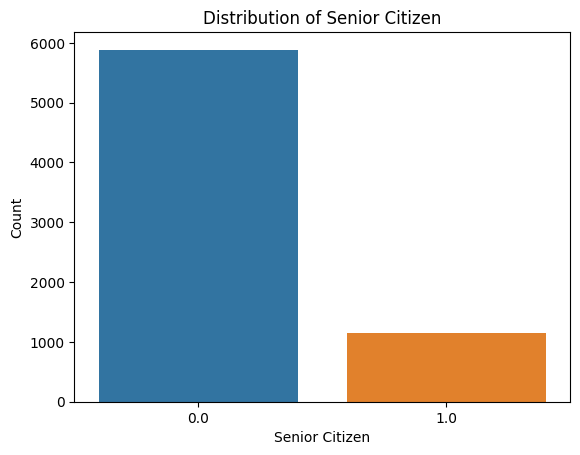

In [14]:
value_counts = df4['SeniorCitizen'].value_counts()

# 바 차트 그리기
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Distribution of Senior Citizen')
plt.show()

df4.drop(['SeniorCitizen'], axis=1, inplace=True)

<br>

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요. I am fool
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* MultipleLines에 대해 countplot을 그리고 churn을 hue 값으로 사용하여 countplot으로 시각화 하고 'MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

* 아까 재윤 형님과 비슷한 생각입니다. 9번은 잘 모르겠습니다
  * 난제 1)시각화를 몇개 해야하는데 subplot를 해야하는건지?
  * 난제 2) 아마도 시각화를 하여 그림을 바탕으로 판단해서 print('O'), print('X') 해야 하는 것 같은데  규수 형님은 상관계수(Pearsonr)를 이용하셔서 O, X인지 판단하셨습니다.

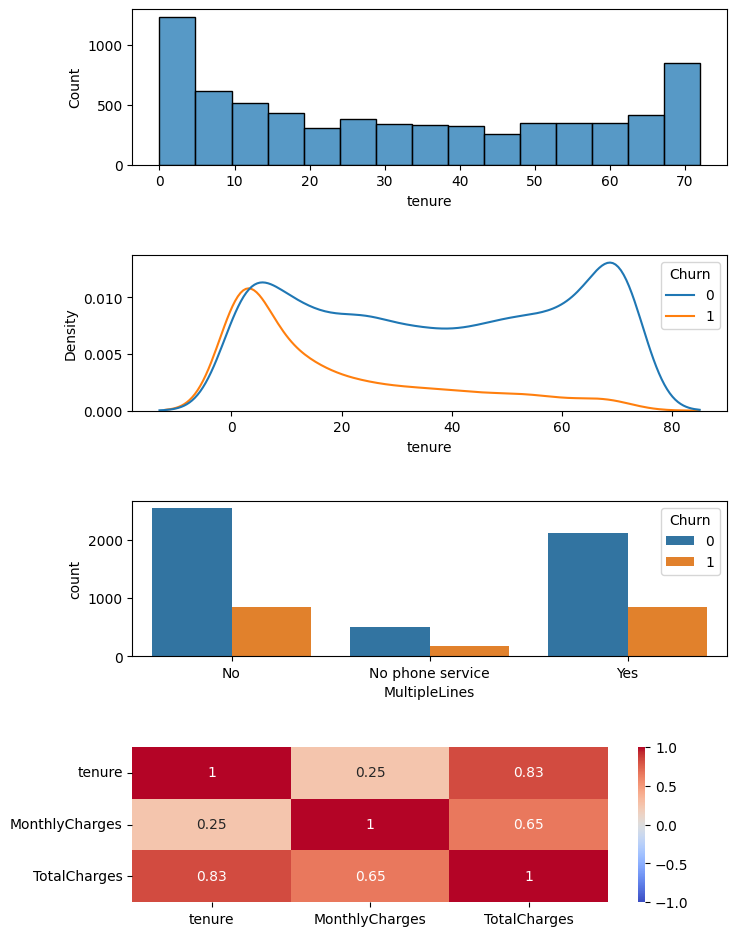

In [ ]:
# 방법 1
f, axes = plt.subplots(4, 1, figsize=(8, 10))
ax1, ax2, ax3, ax4 = axes

sns.histplot(data=df4, x='tenure',ax=ax1)
sns.kdeplot(data=df4, x='tenure',hue='Churn',ax=ax2)
sns.countplot(data=df4, x='MultipleLines',hue='Churn',ax=ax3)

corr_matrix = df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,  ax=ax4)

# subplot 간의 간격 조절
plt.tight_layout(pad=3)  # pad 값은 subplot 간의 간격
plt.show()

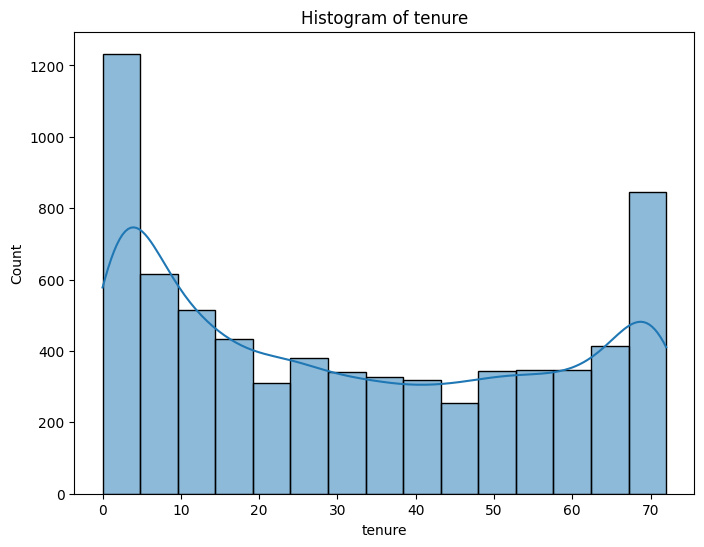

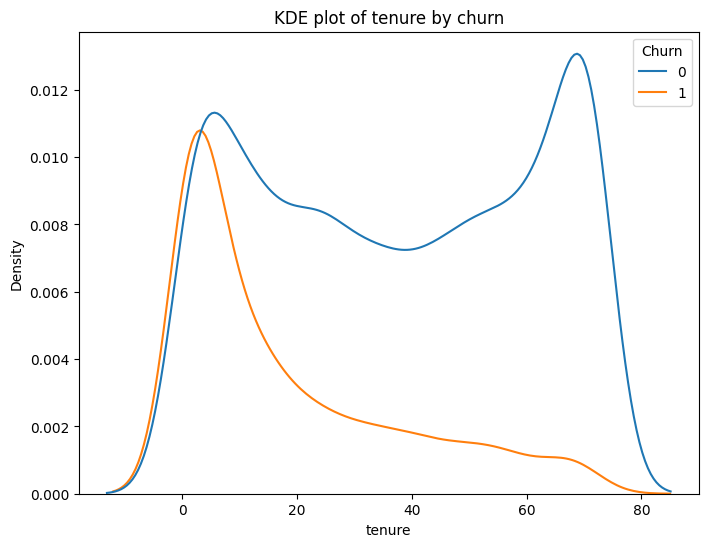

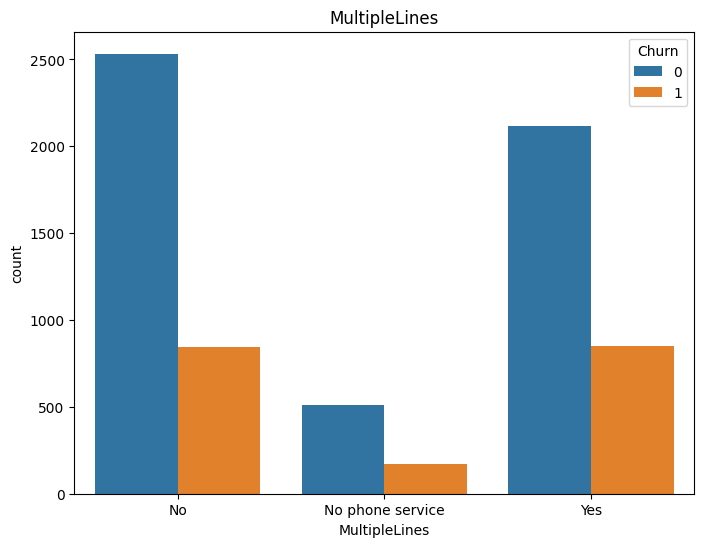

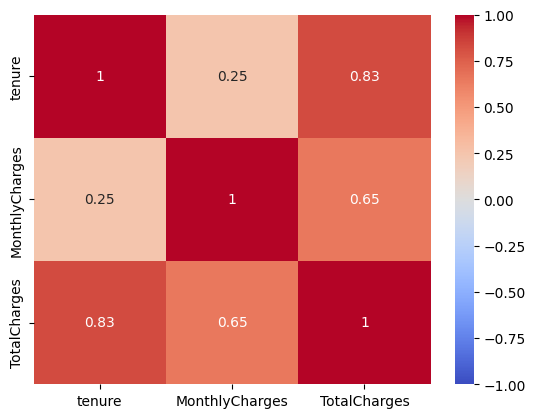

In [ ]:
# 방법 2
# import seaborn as sns

# plt.figure(figsize=(8,6))
# sns.histplot(data=df4, x='tenure', kde=True)
# plt.title('Histogram of tenure')
# plt.show()


# plt.figure(figsize=(8,6))
# sns.kdeplot(data=df4, x='tenure', hue='Churn')
# plt.title('KDE plot of tenure by churn')
# plt.show()

# plt.figure(figsize=(8,6))
# sns.countplot(data=df4, x='MultipleLines', hue='Churn')
# plt.title('MultipleLines')
# plt.show()

# corr_matrix = df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.show()

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [16]:
object_cols = df4.select_dtypes('object').columns.tolist()
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [19]:
# 여기에 답안코드를 작성하세요.
object_cols = df4.select_dtypes('object').columns.tolist()
df5 = pd.get_dummies(columns=object_cols, data=df4)

<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [21]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

X = df5.drop(['Churn'], axis=1)
y = df5['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [23]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # 2차원 넘파이 배열
X_valid = scaler.transform(X_valid) # 2차원 넘파이 배열

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요.
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [27]:
# 여기에 답안코드를 작성하세요.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
# 여기에 답안코드를 작성하세요.
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [30]:
# 여기에 답안코드를 작성하세요.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=3, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [31]:
# 여기에 답안코드를 작성하세요.
import xgboost
xgbc = xgboost.XGBClassifier(n_estimators=3, random_state=42)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [32]:
# 여기에 답안코드를 작성하세요.
import lightgbm
lgbm = lightgbm.LGBMClassifier(n_estimators=3, random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1493, number of negative: 4128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 5621, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265611 -> initscore=-1.017006
[LightGBM] [Info] Start training from score -1.017006


LGBMClassifier(n_estimators=3, random_state=42)

### 14. 바로 위 모델의 성능을 평가하려고 합니다.
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요.
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

* 바로 위 모델?
  * Logistic Regression부터 시작해서 LightGBM까지 모두 말하는건지?
  * 아니면 LightGBM만 말하는건지?
  

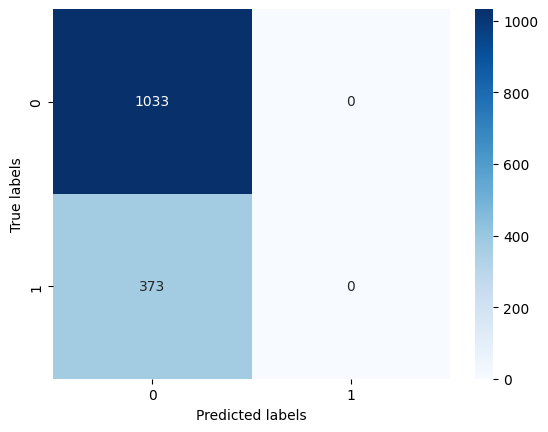

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1406
   macro avg       0.37      0.50      0.42      1406
weighted avg       0.54      0.73      0.62      1406



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lgbm.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

print(classification_report(y_valid, y_pred))

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 손실함수는 MSE(Mean Squared Error)를 사용하세요. -> 분류 모델에서 MSE가 쓰이는지 모르겠다.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [35]:
# 여기에 답안코드를 작성하세요.
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid))

Epoch 1/30
352/352 [==============================] - 8s 4ms/step - loss: 0.4513 - accuracy: 0.7778 - val_loss: 0.4421 - val_accuracy: 0.7817
Epoch 2/30
352/352 [==============================] - 1s 3ms/step - loss: 0.4288 - accuracy: 0.7968 - val_loss: 0.4395 - val_accuracy: 0.7902
Epoch 3/30
352/352 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.7977 - val_loss: 0.4350 - val_accuracy: 0.7852
Epoch 4/30
352/352 [==============================] - 1s 3ms/step - loss: 0.4216 - accuracy: 0.8022 - val_loss: 0.4334 - val_accuracy: 0.7866
Epoch 5/30
352/352 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8052 - val_loss: 0.4347 - val_accuracy: 0.7881
Epoch 6/30
352/352 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8016 - val_loss: 0.4264 - val_accuracy: 0.7930
Epoch 7/30
352/352 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8072 - val_loss: 0.4344 - val_accuracy: 0.7895
Epoch 

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred = model.predict(X_valid) # sigmoid() 함수를 사용했기 떄문에 각각의 관측치가 0 ~ 1의 범위를 가질 것이다.
y_pred = np.where(y_pred > 0.5, 1, 0).ravel() # 1차원 넘파이 배열로 평준화
print('정확도 : ', accuracy_score(y_valid, y_pred))

44/44 [==============================] - 0s 1ms/step
정확도 :  0.7923186344238976


<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요. -> ?????

* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

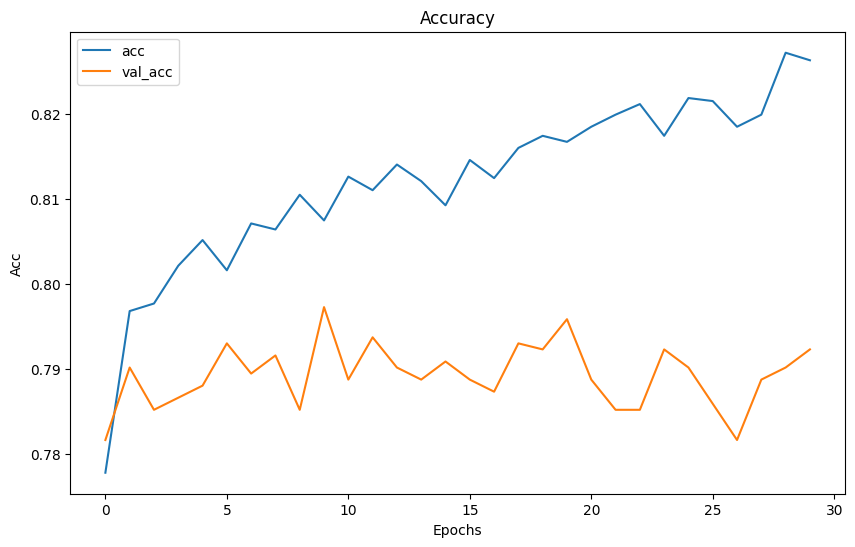

In [37]:
# 여기에 답안코드를 작성하세요.
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### [선택] 모든 과정을 수행한 후에는 머신러닝, 딥러닝 모델의 성능을 향상시켜보세요.